# **VG Sales From 2000 - 2015**
![Gaming GIF](https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExMmRsZDBvMjIxczFtYnpiZG9rMHlmZnc2djZoajByZDFyYWlqdnF1ZCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/qnnuQhywGxs3ZQGQlu/giphy.gif)

**This notebook analyses physical video game sales data to uncover key trends in the gaming industry. The dataset includes information on game titles, publishers, release years, platforms, companies and sales across different regions. The primary questions explored in this analysis include:**

- **How have video game sales evolved over time?**
- **Which companies and publishers dominate the market?**
- **What are sales trends telling us?**
- **What are the regional differences in sales distribution?**
- **Which genres and platforms have been the most successful?** <br>

**Through data cleaning, visualization, and statistical analysis, this notebook provides insights into the historical performance of the gaming industry.**

## Table of Contents
1. [Upload and Exploration of Data](#upload-and-exploration-of-data)
2. [Data Cleaning](#data-cleaning)
3. [Creating New Data Frames](#creating-new-data-frames)
4. [Data Visualization and Analysis](#data-visualization-and-analysis)
5. [Summary](#summary)
6. [Syntax Table](#syntax-table)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify as sqr

### Upload and Exploration of Data

When working with a dataset that is outside any of the libraries ensure that you upload your file onto your notebook.<br>
Once we have loaded up our data set (CSV file) lets do some information gathering such as seeing the structure of columns, duplicates, NaN Values, Unique Values and Statistics.

In [2]:
# Downloading CSV file onto Jupyter Notebook
vg = pd.read_csv('~/Downloads/vgsales.csv')  

# Creating the Data Frame
vgsales = pd.DataFrame(vg)

vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
# Seeing the basic info of loaded Data Set
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
# Using .describe it allows me to see statistics of my Data Set
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
# Using .describe it allows me to see statistics of my Data Set
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
# Check for missing values within our data 
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
# Checking for missing values within our data 
vgsales.isnull().sum()# Displaying the Nan Values

display(vgsales[vgsales.isnull().any(axis=1)])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [8]:
# Checking for duplicated data
vgsales.duplicated().sum()

np.int64(0)

In [9]:
# Checking for unique values in Publisher, Genre and Platform to see if there any outliers that may need removing
vgsales['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [10]:
vgsales['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [11]:
vgsales['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### Data Cleaning

Lets get to cleaning our data

In [12]:
# Removing rows where Publisher is 'Unknown'
vgsales = vgsales[vgsales['Publisher'] != 'Unknown']

# Checking to see if 'Unknown has been dropped from the Publisher column Publisher
print('Unknown' in vgsales['Publisher'].values)

False


In [13]:
# Dropping missing values
vgsales = vgsales.dropna()

# Refering back to earlier .isnull result to see if the necessary data have been dropped
vgsales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [14]:
# Define a dictionary mapping platforms to their respective companies
platform_owners = {
    "Wii": "Nintendo", "NES": "Nintendo", "GB": "Nintendo", "DS": "Nintendo", "SNES": "Nintendo",
    "N64": "Nintendo", "GBA": "Nintendo", "3DS": "Nintendo", "WiiU": "Nintendo", "GC": "Nintendo",
    "PS4": "Sony", "PS3": "Sony", "PS2": "Sony", "PS": "Sony", "PSP": "Sony", "PSV": "Sony",
    "X360": "Microsoft", "XB": "Microsoft", "XOne": "Microsoft",
    "PC": "Various", "2600": "Atari", "SAT": "Sega", "DC": "Sega", "SCD": "Sega", "GEN": "Sega",
    "NG": "SNK", "TG16": "NEC", "3DO": "Panasonic", "GG": "Sega", "WS": "Bandai"
}

# Create a new column "Company" based on the platform
vgsales['Company'] = vgsales['Platform'].map(platform_owners)

In [15]:
# Removing Bandai as they have no data to represent within the time period
vgsales = vgsales[vgsales['Company'] != 'Bandai']
vgsales['Company'].unique()

array(['Nintendo', 'Microsoft', 'Sony', 'Various', 'Atari', 'Sega', 'SNK',
       'NEC', 'Panasonic', nan], dtype=object)

In [16]:
# Converting Year column to integers
vgsales['Year'] = vgsales['Year'].astype(int)

In [17]:
# Setting rank as the index
vgsales.set_index('Rank')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Company
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Nintendo
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Nintendo
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Sony


In [18]:
# Renaming Name to Game Title
vgsales.rename(columns={'Name': 'Game Title'}, inplace=True)

In [19]:
# Filtering out the year as the Years between 2000 - 2015 show the most relevant data for analysis
vg = vgsales[(vgsales['Year'] >= 2000) & (vgsales['Year'] <= 2015)]

In [20]:
# Viewing cleaned Data
vg

,Rank,Game Title,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Company
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Nintendo
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Nintendo
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Nintendo
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Sony
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,Nintendo


### Creating New Data Frames

Lets create some new data frames to help us in our future analysis

In [21]:
vg_top_games = vg.sort_values(by='Global_Sales', ascending=False).head(10)

vg_top_games

,Rank,Game Title,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Company
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Nintendo
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Nintendo
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,Nintendo
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,Nintendo
11,12,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,Nintendo
13,14,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,Nintendo
14,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,Nintendo


In [22]:
vg_genre_sales = vg.groupby('Genre')['Global_Sales'].sum().reset_index()

vg_genre_sales

,Genre,Global_Sales
0,Action,1509.85
1,Adventure,182.41
2,Fighting,309.46
3,Misc,715.46
4,Platform,495.59
5,Puzzle,139.91
6,Racing,560.67
7,Role-Playing,713.33
8,Shooter,878.98
9,Simulation,336.59


In [23]:
vg_yearly_releases = vg.groupby('Year')['Game Title'].count().reset_index().rename(columns={'Name': 'Number of Releases'})

vg_yearly_releases

,Year,Game Title
0,2000,347
1,2001,477
2,2002,826
3,2003,774
4,2004,743
5,2005,935
6,2006,1006
7,2007,1198
8,2008,1426
9,2009,1430


In [24]:
vg_company_sales = vg.groupby(['Year', 'Company'])['Global_Sales'].sum().reset_index()

vg_company_sales

,Year,Company,Global_Sales
0,2000,Microsoft,0.99
1,2000,Nintendo,53.83
2,2000,Sega,5.99
3,2000,Sony,135.39
4,2000,Various,4.68
...,...,...,...
64,2014,Various,13.39
65,2015,Microsoft,70.71
66,2015,Nintendo,44.91
67,2015,Sony,140.70


In [25]:
vg_company_share = vg.groupby('Company')['Global_Sales'].sum().reset_index()

vg_company_share

,Company,Global_Sales
0,Microsoft,1348.62
1,Nintendo,2611.91
2,Sega,7.41
3,Sony,2903.32
4,Various,200.66


In [26]:
vg_publisher_sales = vg.groupby('Publisher')['Global_Sales'].sum().reset_index()
vg_publisher_sales = vg_publisher_sales.sort_values(by='Global_Sales', ascending=False).head(10)

vg_publisher_sales

,Publisher,Global_Sales
277,Nintendo,1181.48
107,Electronic Arts,996.16
15,Activision,673.43
402,Ubisoft,455.14
348,Sony Computer Entertainment,428.99
379,Take-Two Interactive,386.56
375,THQ,320.73
251,Microsoft Game Studios,239.15
342,Sega,221.80
212,Konami Digital Entertainment,221.44


In [27]:
vg_region_trend = vg.groupby(['Year'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

vg_region_trend

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2000,94.49,52.75,42.09,11.62
1,2001,173.70,93.67,39.16,22.42
2,2002,216.16,109.72,41.70,27.28
3,2003,192.92,103.56,34.20,25.99
4,2004,218.78,105.91,41.65,47.24
5,2005,240.84,121.53,54.28,40.43
6,2006,263.04,129.22,73.71,54.43
7,2007,311.18,160.16,60.06,77.58
8,2008,351.21,184.40,60.18,82.37
9,2009,338.85,191.58,61.89,74.77


In [28]:
vg_genre_sales = vg.groupby('Genre')['Global_Sales'].sum().reset_index()
vg_genre_sales = vg_genre_sales.sort_values(by='Global_Sales', ascending=False)

vg_genre_sales

,Genre,Global_Sales
0,Action,1509.85
10,Sports,1114.68
8,Shooter,878.98
3,Misc,715.46
7,Role-Playing,713.33
6,Racing,560.67
4,Platform,495.59
9,Simulation,336.59
2,Fighting,309.46
1,Adventure,182.41


### Data Visualization and Analysis

#### Sales Trend Over Time by Company

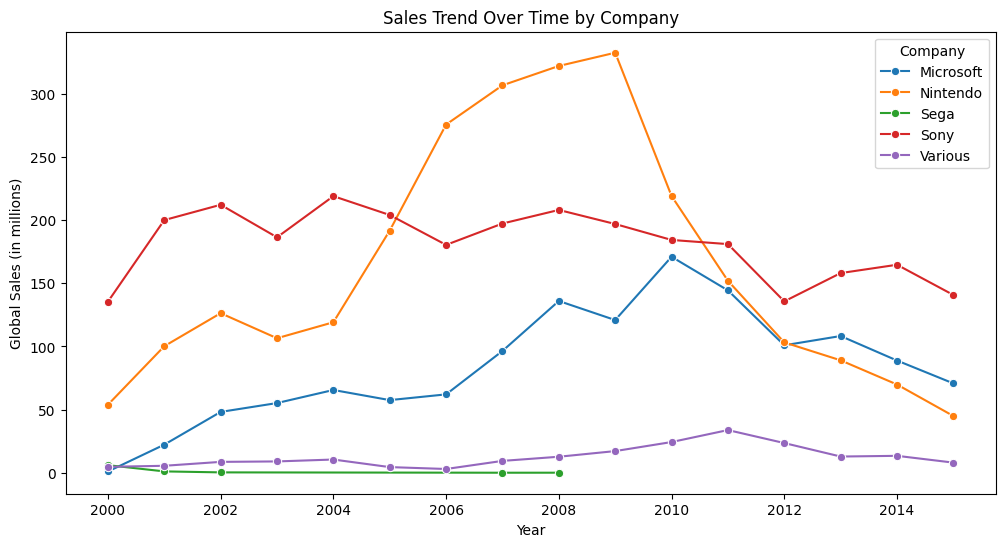

In [29]:
# Define figure size
plt.figure(figsize=(12, 6))

# Create lineplot
sns.lineplot(data=vg_company_sales, x='Year', y='Global_Sales', hue='Company', marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.title('Sales Trend Over Time by Company')
plt.legend(title='Company')

plt.show()

#### Market Share of companies based on Global Sales

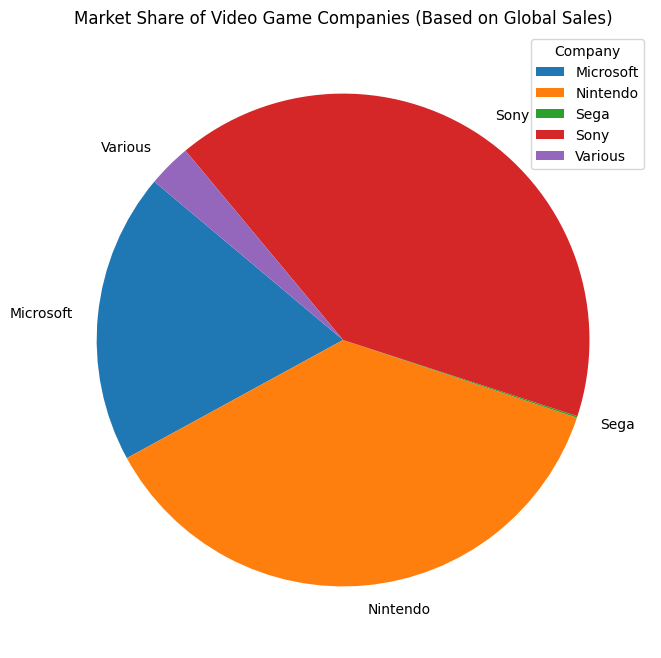

In [30]:
# Define figure size
plt.figure(figsize=(8, 8))

# Create pie chart
plt.pie(vg_company_share['Global_Sales'], labels=vg_company_share['Company'], startangle=140)

# Set labels and title
plt.title('Market Share of Video Game Companies (Based on Global Sales)')
plt.legend(title='Company')

plt.show()

#### Top-Selling Publishers

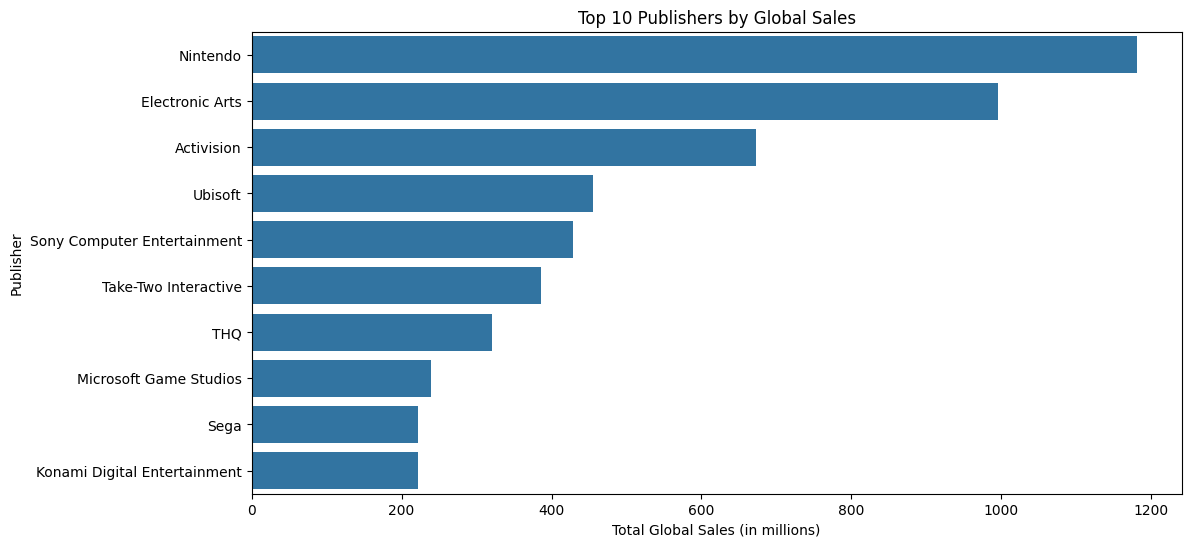

In [31]:
# Define figure size
plt.figure(figsize=(12, 6))

# Create barplot
sns.barplot(y=vg_publisher_sales['Publisher'], x=vg_publisher_sales['Global_Sales'])

# Set labels and title
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Publisher')
plt.title('Top 10 Publishers by Global Sales')

plt.show()

#### Regional Sales Over the Years

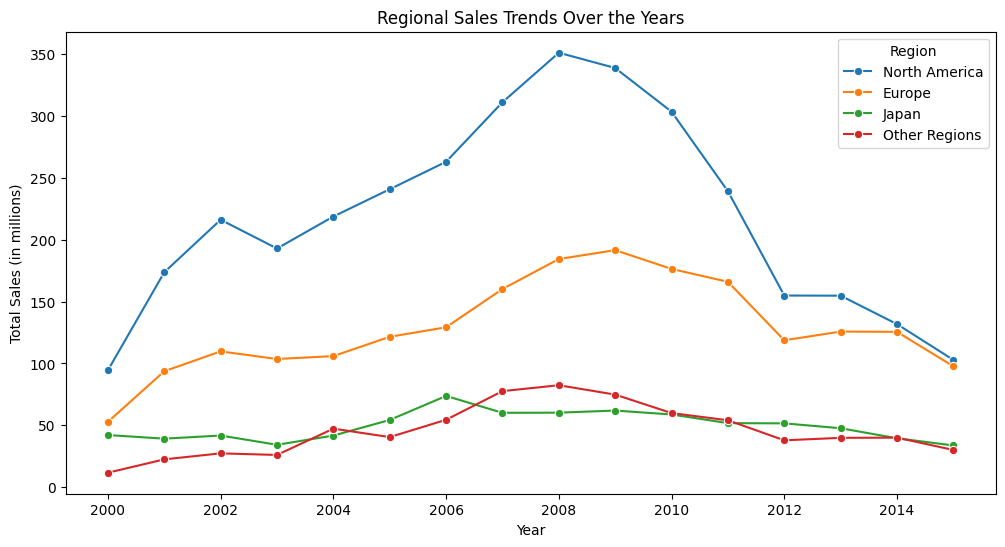

In [32]:
# Define figure size
plt.figure(figsize=(12, 6))

# Create lineplots
sns.lineplot(data=vg_region_trend, x='Year', y='NA_Sales', label='North America', marker='o')
sns.lineplot(data=vg_region_trend, x='Year', y='EU_Sales', label='Europe', marker='o')
sns.lineplot(data=vg_region_trend, x='Year', y='JP_Sales', label='Japan', marker='o')
sns.lineplot(data=vg_region_trend, x='Year', y='Other_Sales', label='Other Regions', marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.title('Regional Sales Trends Over the Years')
plt.legend(title='Region')

plt.show()

#### Yearly releases across 2000 - 2015

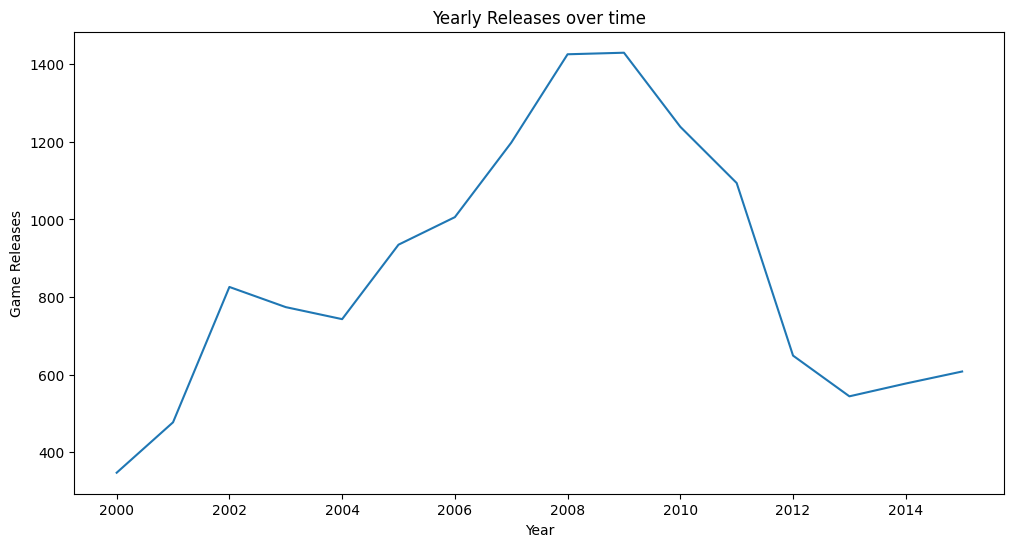

In [33]:
# Define figure size
plt.figure(figsize=(12, 6))

# Create lineplot
sns.lineplot(x='Year', y='Game Title', data=vg_yearly_releases)

# Set labels and title
plt.title('Yearly Releases over time')
plt.xlabel('Year')
plt.ylabel('Game Releases')

plt.show()

#### Top 10 Video Games by Sales (Stacked by Region)

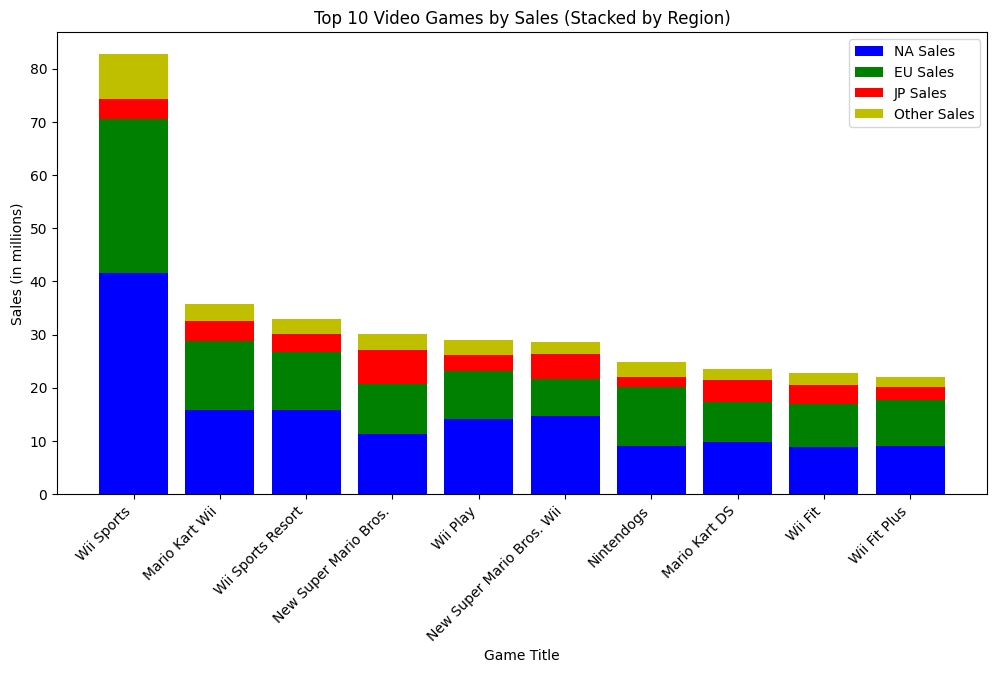

In [34]:
# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))

# Stack the values for each game by region
plt.bar(vg_top_games['Game Title'], vg_top_games['NA_Sales'], label='NA Sales', color='b')
plt.bar(vg_top_games['Game Title'], vg_top_games['EU_Sales'], bottom=vg_top_games['NA_Sales'], label='EU Sales', color='g')
plt.bar(vg_top_games['Game Title'], vg_top_games['JP_Sales'], bottom=vg_top_games['NA_Sales'] + vg_top_games['EU_Sales'], label='JP Sales', color='r')
plt.bar(vg_top_games['Game Title'], vg_top_games['Other_Sales'], bottom=vg_top_games['NA_Sales'] + vg_top_games['EU_Sales'] + vg_top_games['JP_Sales'], label='Other Sales', color='y')

# Set labels and title
plt.xlabel('Game Title')
plt.ylabel('Sales (in millions)')
plt.title('Top 10 Video Games by Sales (Stacked by Region)')
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.show()

#### Best Performing Genres by Global Sales

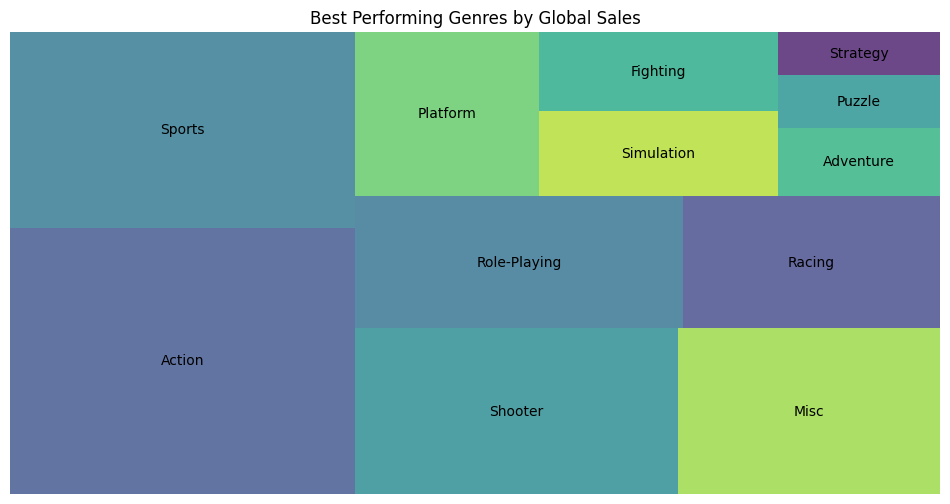

In [35]:
# Define figure size
plt.figure(figsize=(12, 6))

# Create treemap
sqr.plot(sizes=vg_genre_sales['Global_Sales'], label=vg_genre_sales['Genre'], alpha=0.8)

# Set labels and title
plt.title('Best Performing Genres by Global Sales')
plt.axis('off')

plt.show()

### Summary

1. **Company Sales Trends Over Time**
- Video game sales have shown fluctuating trends, with notable growth during certain periods, particularly in the late 2000s and early 2010s.
- The line chart analysis indicates that the industry experienced a surge in global sales around major console releases and successful franchise launches.
- Companies like Nintendo, Sony, and Microsoft have shown varied sales trends, with Nintendo dominating during certain console generations and Sony/Microsoft gaining significant market share in recent years.
2. **Market Share of Companies**
- A few major companies dominate the global video game industry, with Nintendo and Sony capturing the largest shares.
- The pie chart visualization shows that while smaller publishers contribute to the market, the majority of global sales are concentrated among a handful of key players.
- The success of gaming companies is often linked to hardware sales, as companies that produce both consoles and games tend to generate the highest revenue.
- Due to the increase in sales from 2008 onwards, Microsoft has become the third-largest market shareholder, likely due to the success of the Xbox 360 and Xbox One.
- Sega holds the smallest market share, possibly due to discontinuing the Dreamcast in 2001.
3. **Rise of the Digital Era**
- From 2008 onwards, all regions see a significant drop in physical sales, especially between 2011-2012. This could be due to the rise of digital game copies downloadable directly onto consoles, coinciding with the introduction of broadband in the early 2000s and improved broadband speeds from the 2010s.
- The graph confirms the decline in physical release sales from 2010 onwards, ushering in a new era of the digital game market.
- Please refer to this article from Gameopedia covering the decline of physical sales https://www.gameopedia.com/decline-of-physical-games/
4. **Top Publishers by Global Sales**
- The top 10 publishers by global sales include Nintendo, Electronic Arts (EA), Activision, Ubisoft, and Take-Two Interactive, among others.
- Nintendo leads in overall sales due to its extensive portfolio of successful franchises like Mario, Pokémon, and The Legend of Zelda.
Electronic Arts (EA) and Activision have sustained high sales due to their dominance in sports (FIFA, Madden) and first-person shooter (Call of Duty) genres.
- The bar chart analysis indicates that established publishers with long-standing franchises tend to outperform newer entrants in the market.
5. **Most Successful Genres**
- Action, Shooter, and Sports genres consistently top global sales, with franchises like Call of Duty, FIFA, and Grand Theft Auto being among the highest-selling games.
- Role-Playing Games (RPGs) have also performed well, particularly in regions like Japan, where franchises like Final Fantasy and Pokémon dominate.**<br>
6. **Most Successful Platforms:**
- Historically, PlayStation (PS2, PS3, PS4), Xbox, and Nintendo platforms have generated the highest sales.
- The Nintendo DS and Wii stand out as some of the most successful platforms due to their appeal to both casual and hardcore gamers.
- The rise of PC gaming and digital distribution (Steam, Epic Games Store) has also contributed significantly to industry revenue in recent years.

### Syntax Table

In [36]:
# Creating a Syntax Table
syntax_table = pd.DataFrame({
    'Syntax': [".info()", ".head()", ".isnull().sum()", ".duplicated().sum()", ".describe()"],
    'Description': ["Displays basic information about the dataset", "Shows the first few rows", "Counts missing values in each column", "Counts duplicate rows", "Provides summary statistics"]
})
display(syntax_table)

,Syntax,Description
0,.info(),Displays basic information about the dataset
1,.head(),Shows the first few rows
2,.isnull().sum(),Counts missing values in each column
3,.duplicated().sum(),Counts duplicate rows
4,.describe(),Provides summary statistics
